# House Price Predict
### preprocessing 
>* 결측치 파악 
>* 이상치 제거
>* scaling

### Model
>* MLP Regression ( 3 hidden layer , each hidden unit 250,700,1000, 600)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing
from scipy import stats
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
corrmat = df.corr()
cols = corrmat.nlargest(40, 'SalePrice')['SalePrice'].index

print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


In [5]:
print(df.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


### Null 값이 많은 순서대로 Data handling
>* 범주형 연속형 구분지어서 handling

In [6]:
# PoolQC handling
data = pd.concat([df['SalePrice'], df['PoolQC']], axis=1)


df['PoolQC'] = df['PoolQC'].replace('Ex', 'Ex')
df['PoolQC'] = df['PoolQC'].replace('Fa','GF')
df['PoolQC'] = df['PoolQC'].replace('Gd','GF')
df.loc[df.SalePrice >= 300000,'PoolQC'] = 'Ex'
df.loc[df.SalePrice < 300000,'PoolQC'] = 'GF'

df['PoolQC'].head()

0    GF
1    GF
2    GF
3    GF
4    GF
Name: PoolQC, dtype: object

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

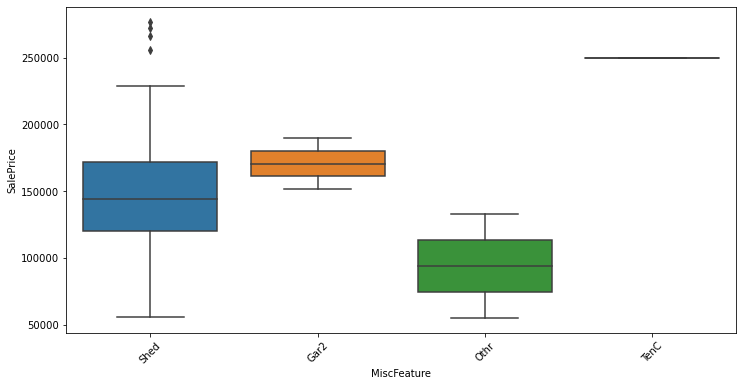

In [7]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MiscFeature', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

df.MiscFeature.describe()

In [8]:
df.loc[df.SalePrice >= 200000,'MiscFeature'] = 'TenC'
df.loc[df.SalePrice < 200000 ,'MiscFeature'] =  'Shed_Gar2'
df.loc[df.SalePrice < 140000,'MiscFeature'] = 'Othr'

df.MiscFeature.head()

0         TenC
1    Shed_Gar2
2         TenC
3    Shed_Gar2
4         TenC
Name: MiscFeature, dtype: object

count          1460
unique            3
top       Shed_Gar2
freq            536
Name: MiscFeature, dtype: object

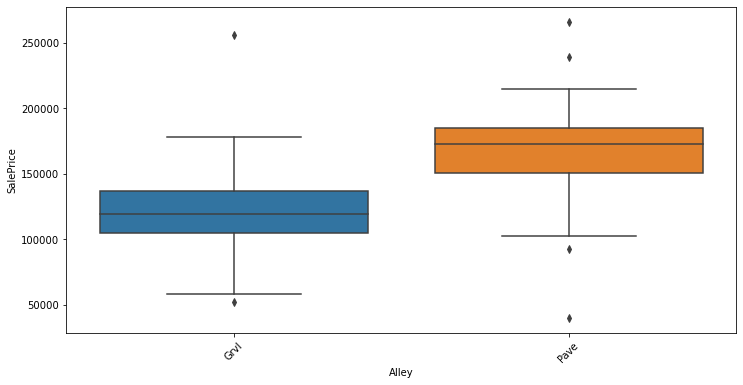

In [9]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

df.MiscFeature.describe()

In [10]:
df.loc[df.SalePrice >= 150000,'Alley'] = 'Pave'
df.loc[df.SalePrice < 150000 ,'Alley'] =  'Grvl'

df.Alley.head()

0    Pave
1    Pave
2    Pave
3    Grvl
4    Pave
Name: Alley, dtype: object

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

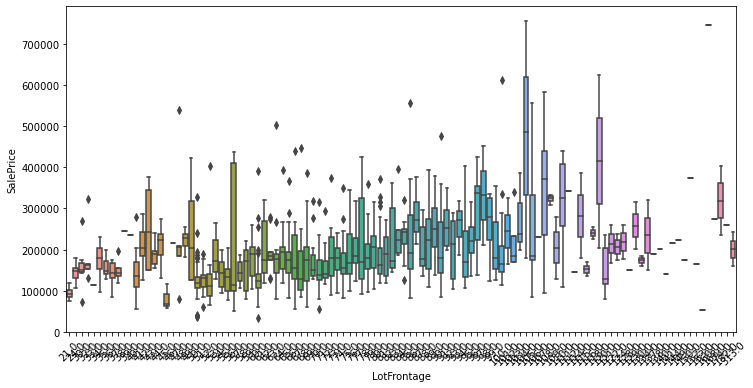

In [11]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'LotFrontage', y = 'SalePrice',  data = df)

xt = plt.xticks(rotation=45)

df.LotFrontage.describe()

In [12]:
cols = corrmat.nlargest(40, 'LotFrontage')['LotFrontage'].index

print(cols)

df['1stFlrSF'].describe()

Index(['LotFrontage', '1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'SalePrice', 'GarageArea', 'GarageCars', 'Fireplaces',
       'BedroomAbvGr', 'OverallQual', 'BsmtFinSF1', 'PoolArea', 'FullBath',
       'MasVnrArea', 'OpenPorchSF', 'BsmtUnfSF', 'YearBuilt', 'BsmtFullBath',
       'YearRemodAdd', 'WoodDeckSF', '2ndFlrSF', 'GarageYrBlt', '3SsnPorch',
       'HalfBath', 'BsmtFinSF2', 'ScreenPorch', 'LowQualFinSF', 'MoSold',
       'EnclosedPorch', 'YrSold', 'MiscVal', 'KitchenAbvGr', 'BsmtHalfBath',
       'Id', 'OverallCond', 'MSSubClass'],
      dtype='object')


count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [13]:
df['1stFlrSF'] = (df['1stFlrSF'] - df['1stFlrSF'].mean()) / (df['1stFlrSF'].max() - df['1stFlrSF'].min())
df['LotFrontage'] = (df['LotFrontage'] - df['LotFrontage'].mean()) / (df['LotFrontage'].max() - df['LotFrontage'].min())
df['LotFrontage'] = df['LotFrontage'] .fillna(df['1stFlrSF'])

df['LotFrontage'].head()

0   -0.017294
1    0.034075
2   -0.007020
3   -0.034418
4    0.047774
Name: LotFrontage, dtype: float64

In [14]:
df['GarageCond'] = df['GarageCond'].fillna('No')
df['GarageType'] = df['GarageType'].fillna('No')
df['GarageFinish'] = df['GarageFinish'].fillna('No')
df['GarageQual'] = df['GarageQual'].fillna('No')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [15]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('dont')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('dont')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('dont')
df['BsmtCond'] = df['BsmtCond'].fillna('dont')
df['BsmtQual'] = df['BsmtQual'].fillna('dont')

In [16]:
df = df.drop(['Fence','Id','FireplaceQu'],axis=1)

In [17]:
df = df.dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,-0.017294,8450,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,GF,TenC,0,2,2008,WD,Normal,208500
1,20,RL,0.034075,9600,Pave,Pave,Reg,Lvl,AllPub,FR2,...,0,0,GF,Shed_Gar2,0,5,2007,WD,Normal,181500
2,60,RL,-0.007020,11250,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,GF,TenC,0,9,2008,WD,Normal,223500
3,70,RL,-0.034418,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,GF,Shed_Gar2,0,2,2006,WD,Abnorml,140000
4,60,RL,0.047774,14260,Pave,Pave,IR1,Lvl,AllPub,FR2,...,0,0,GF,TenC,0,12,2008,WD,Normal,250000


#### 이상치 제거
* 그래프 시각화

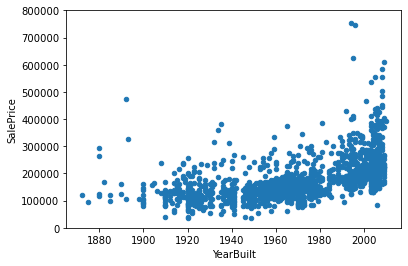

In [18]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)

data[data['YearBuilt'] < 1900].sort_values(['SalePrice'])

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [19]:
df = df.drop([523])
df = df.drop([1298])
df = df.drop([457])
df = df.drop([1182])
df = df.drop([691])
df = df.drop([185])
df = df.drop([1250])
df = df.drop([1373])
df = df.drop([1044])
df =df.drop([332])
df=df.drop([496])
df=df.drop([53])

In [20]:
df = pd.get_dummies(df)

In [21]:
y_data = df['SalePrice']
y_data = y_data.values.reshape(-1,1)
y_data = y_data.transpose()
min_max_scaler_y = preprocessing.MinMaxScaler()
y_data = min_max_scaler_y.fit_transform(y_data)


x_data = df.drop(['SalePrice'],axis=1)
x_data = x_data.values.reshape(-1, 1)
x_data = x_data.transpose()
min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [22]:
y_data.shape

(1, 1439)

In [23]:
x_data.shape

(1, 410115)

In [24]:
print(y_data)
print()
print(x_data)

[[0. 0. 0. ... 0. 0. 0.]]

[[0. 0. 0. ... 0. 0. 0.]]


In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingClassifier

#### model 설정
* LinearRegression 의 경우 R : 95.3
* RANSAC 의 경우 R : 95.7

In [26]:
regr =MLPRegressor(
    hidden_layer_sizes=(250,700,1000,600),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.00025, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
)

regr.fit(x_data,y_data)

y_true = y_data
y_pred = regr.predict(x_data)

RMSE = (mean_squared_error(y_true, y_pred))**0.5
MSE = mean_squared_error(y_true, y_pred)
MAE = mean_absolute_error(y_true,y_pred)
R = r2_score(y_true, y_pred) 

print('MAE : ' , MAE , '\nMSE :',MSE, '\nRMSE : ',RMSE , '\nR :',R)

MAE :  2.626717400132404e-05 
MSE : 8.041748996731623e-10 
RMSE :  2.8357977707748525e-05 
R : nan


In [27]:
regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

regr.fit(x_data, y_data)

y_true = y_data
y_pred = regr.predict(x_data)

RMSE = (mean_squared_error(y_true, y_pred))**0.5
MSE = mean_squared_error(y_true, y_pred)
MAE = mean_absolute_error(y_true,y_pred)
R = r2_score(y_true, y_pred)

print('MAE : ' , MAE , '\nMSE :',MSE, '\nRMSE : ',RMSE , '\nR :',R)   

MAE :  0.0 
MSE : 0.0 
RMSE :  0.0 
R : nan
